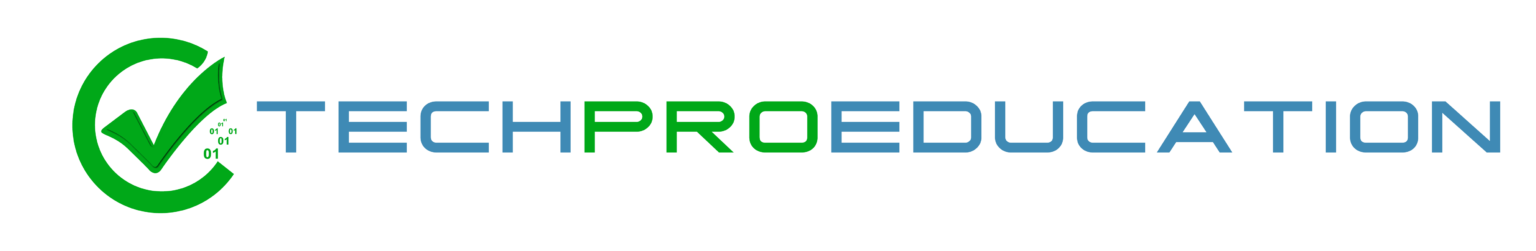

# **Adult Income Prediction**

**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.


**Attribute Information:**

Age: Describes the age of individuals. Continuous.

Workclass: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

fnlwgt: Continuous.

education: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

education-num: Number of years spent in education. Continuous.

marital-status: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

occupation: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

relationship: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

race: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

sex: Female, Male.

capital-gain: Continuous.

capital-loss: Continuous.

hours-per-week: Continuous.

native-country: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

salary: >50K,<=50K

# Exploratory Data Analysis and Visualization

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

#%matplotlib inline
#%matplotlib notebook
plt.rcParams["figure.figsize"] = (10,6)
import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")
pd.set_option('display.float_format', lambda x: '%.3f' % x)
#pd.options.display.float_format = '{:.3f}'.format

In [2]:
df = pd.read_csv("adult.csv")

In [3]:
df.shape

(32561, 15)

In [4]:
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [5]:
df.sample(10)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
28172,34,Private,346034,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,0,40,El-Salvador,<=50K
1259,17,Private,132680,10th,6,Never-married,Other-service,Own-child,White,Female,0,1602,10,United-States,<=50K
17918,37,Private,401998,HS-grad,9,Widowed,Machine-op-inspct,Unmarried,White,Female,0,0,20,United-States,<=50K
21181,41,Private,171546,Bachelors,13,Married-civ-spouse,Tech-support,Husband,White,Male,0,0,45,United-States,>50K
26509,61,Self-emp-not-inc,117387,11th,7,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,20,United-States,<=50K
20739,27,Private,154210,11th,7,Married-spouse-absent,Sales,Own-child,Asian-Pac-Islander,Male,0,0,35,India,<=50K
16009,49,Private,135643,HS-grad,9,Widowed,Craft-repair,Unmarried,Asian-Pac-Islander,Female,0,0,40,South,<=50K
30746,44,Private,215304,Bachelors,13,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,45,United-States,>50K
28190,28,Private,83879,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,0,0,40,United-States,<=50K
9806,49,Self-emp-not-inc,233059,HS-grad,9,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,60,United-States,<=50K


In [6]:
df.info

<bound method DataFrame.info of        age workclass  fnlwgt     education  education.num      marital.status  \
0       90         ?   77053       HS-grad              9             Widowed   
1       82   Private  132870       HS-grad              9             Widowed   
2       66         ?  186061  Some-college             10             Widowed   
3       54   Private  140359       7th-8th              4            Divorced   
4       41   Private  264663  Some-college             10           Separated   
...    ...       ...     ...           ...            ...                 ...   
32556   22   Private  310152  Some-college             10       Never-married   
32557   27   Private  257302    Assoc-acdm             12  Married-civ-spouse   
32558   40   Private  154374       HS-grad              9  Married-civ-spouse   
32559   58   Private  151910       HS-grad              9             Widowed   
32560   22   Private  201490       HS-grad              9       Never-married

In [7]:
df.duplicated().sum()

24

In [8]:
df = df.drop_duplicates()

In [9]:
df.isna().sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [10]:
df["workclass"].value_counts()

Private             22673
Self-emp-not-inc     2540
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [11]:
df.isin(["?"]).any()

age               False
workclass          True
fnlwgt            False
education         False
education.num     False
marital.status    False
occupation         True
relationship      False
race              False
sex               False
capital.gain      False
capital.loss      False
hours.per.week    False
native.country     True
income            False
dtype: bool

In [12]:
df.isin(["?"]).sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     582
income               0
dtype: int64

In [13]:
df.replace("?", "Unknown", inplace=True)

In [14]:
df.isin(["?"]).sum()

age               0
workclass         0
fnlwgt            0
education         0
education.num     0
marital.status    0
occupation        0
relationship      0
race              0
sex               0
capital.gain      0
capital.loss      0
hours.per.week    0
native.country    0
income            0
dtype: int64

In [15]:
df.groupby("education")["education.num"].value_counts(dropna=False)

education     education.num
10th          6                  933
11th          7                 1175
12th          8                  433
1st-4th       2                  166
5th-6th       3                  332
7th-8th       4                  645
9th           5                  514
Assoc-acdm    12                1067
Assoc-voc     11                1382
Bachelors     13                5353
Doctorate     16                 413
HS-grad       9                10494
Masters       14                1722
Preschool     1                   50
Prof-school   15                 576
Some-college  10                7282
Name: education.num, dtype: int64

In [16]:
df.drop("education.num", axis = 1, inplace=True)

In [17]:
df.groupby("relationship")["marital.status"].value_counts(dropna=False)

relationship    marital.status       
Husband         Married-civ-spouse       13178
                Married-AF-spouse            9
Not-in-family   Never-married             4694
                Divorced                  2403
                Widowed                    547
                Separated                  420
                Married-spouse-absent      211
                Married-civ-spouse          17
Other-relative  Never-married              611
                Married-civ-spouse         124
                Divorced                   110
                Separated                   55
                Widowed                     48
                Married-spouse-absent       32
                Married-AF-spouse            1
Own-child       Never-married             4481
                Divorced                   328
                Separated                   99
                Married-civ-spouse          95
                Married-spouse-absent       45
                Widowe

In [18]:
df.relationship.value_counts()

Husband           13187
Not-in-family      8292
Own-child          5064
Unmarried          3445
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [19]:
df.income.value_counts()

<=50K    24698
>50K      7839
Name: income, dtype: int64

In [20]:
df.income.value_counts(normalize = True)

<=50K   0.759
>50K    0.241
Name: income, dtype: float64

In [21]:
df["income"] = df["income"].map({"<=50K": 0, ">50K": 1})

In [22]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.000,38.586,13.638,17.000,28.000,37.000,48.000,90.000
fnlwgt,32537.000,189780.849,105556.471,12285.000,117827.000,178356.000,236993.000,1484705.000
capital.gain,32537.000,1078.444,7387.957,0.000,0.000,0.000,0.000,99999.000
capital.loss,32537.000,87.368,403.102,0.000,0.000,0.000,0.000,4356.000
hours.per.week,32537.000,40.440,12.347,1.000,40.000,40.000,45.000,99.000
income,32537.000,0.241,0.428,0.000,0.000,0.000,0.000,1.000


In [23]:
df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Unknown,186061,Some-college,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


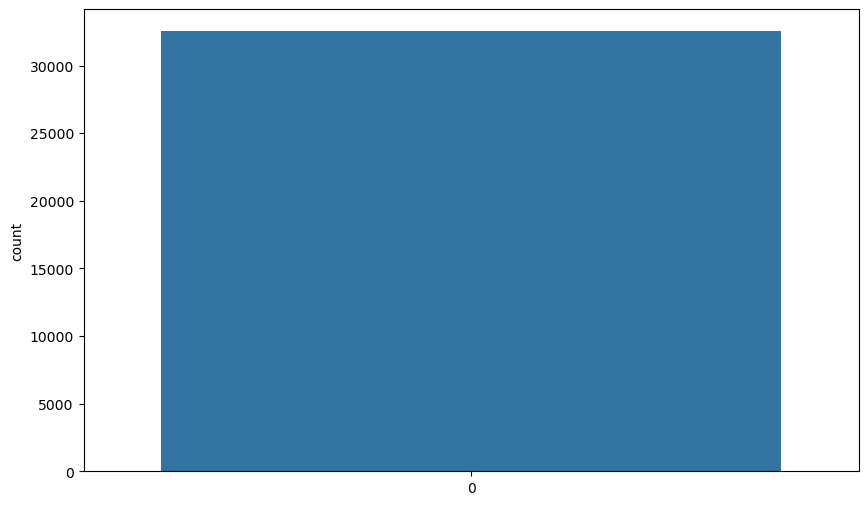

In [24]:
sns.countplot(df.income)
plt.show()

In [25]:
df

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,Unknown,77053,HS-grad,Widowed,Unknown,Not-in-family,White,Female,0,4356,40,United-States,0
1,82,Private,132870,HS-grad,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,0
2,66,Unknown,186061,Some-college,Widowed,Unknown,Unmarried,Black,Female,0,4356,40,United-States,0
3,54,Private,140359,7th-8th,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,0
4,41,Private,264663,Some-college,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,0
32557,27,Private,257302,Assoc-acdm,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32558,40,Private,154374,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32559,58,Private,151910,HS-grad,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0


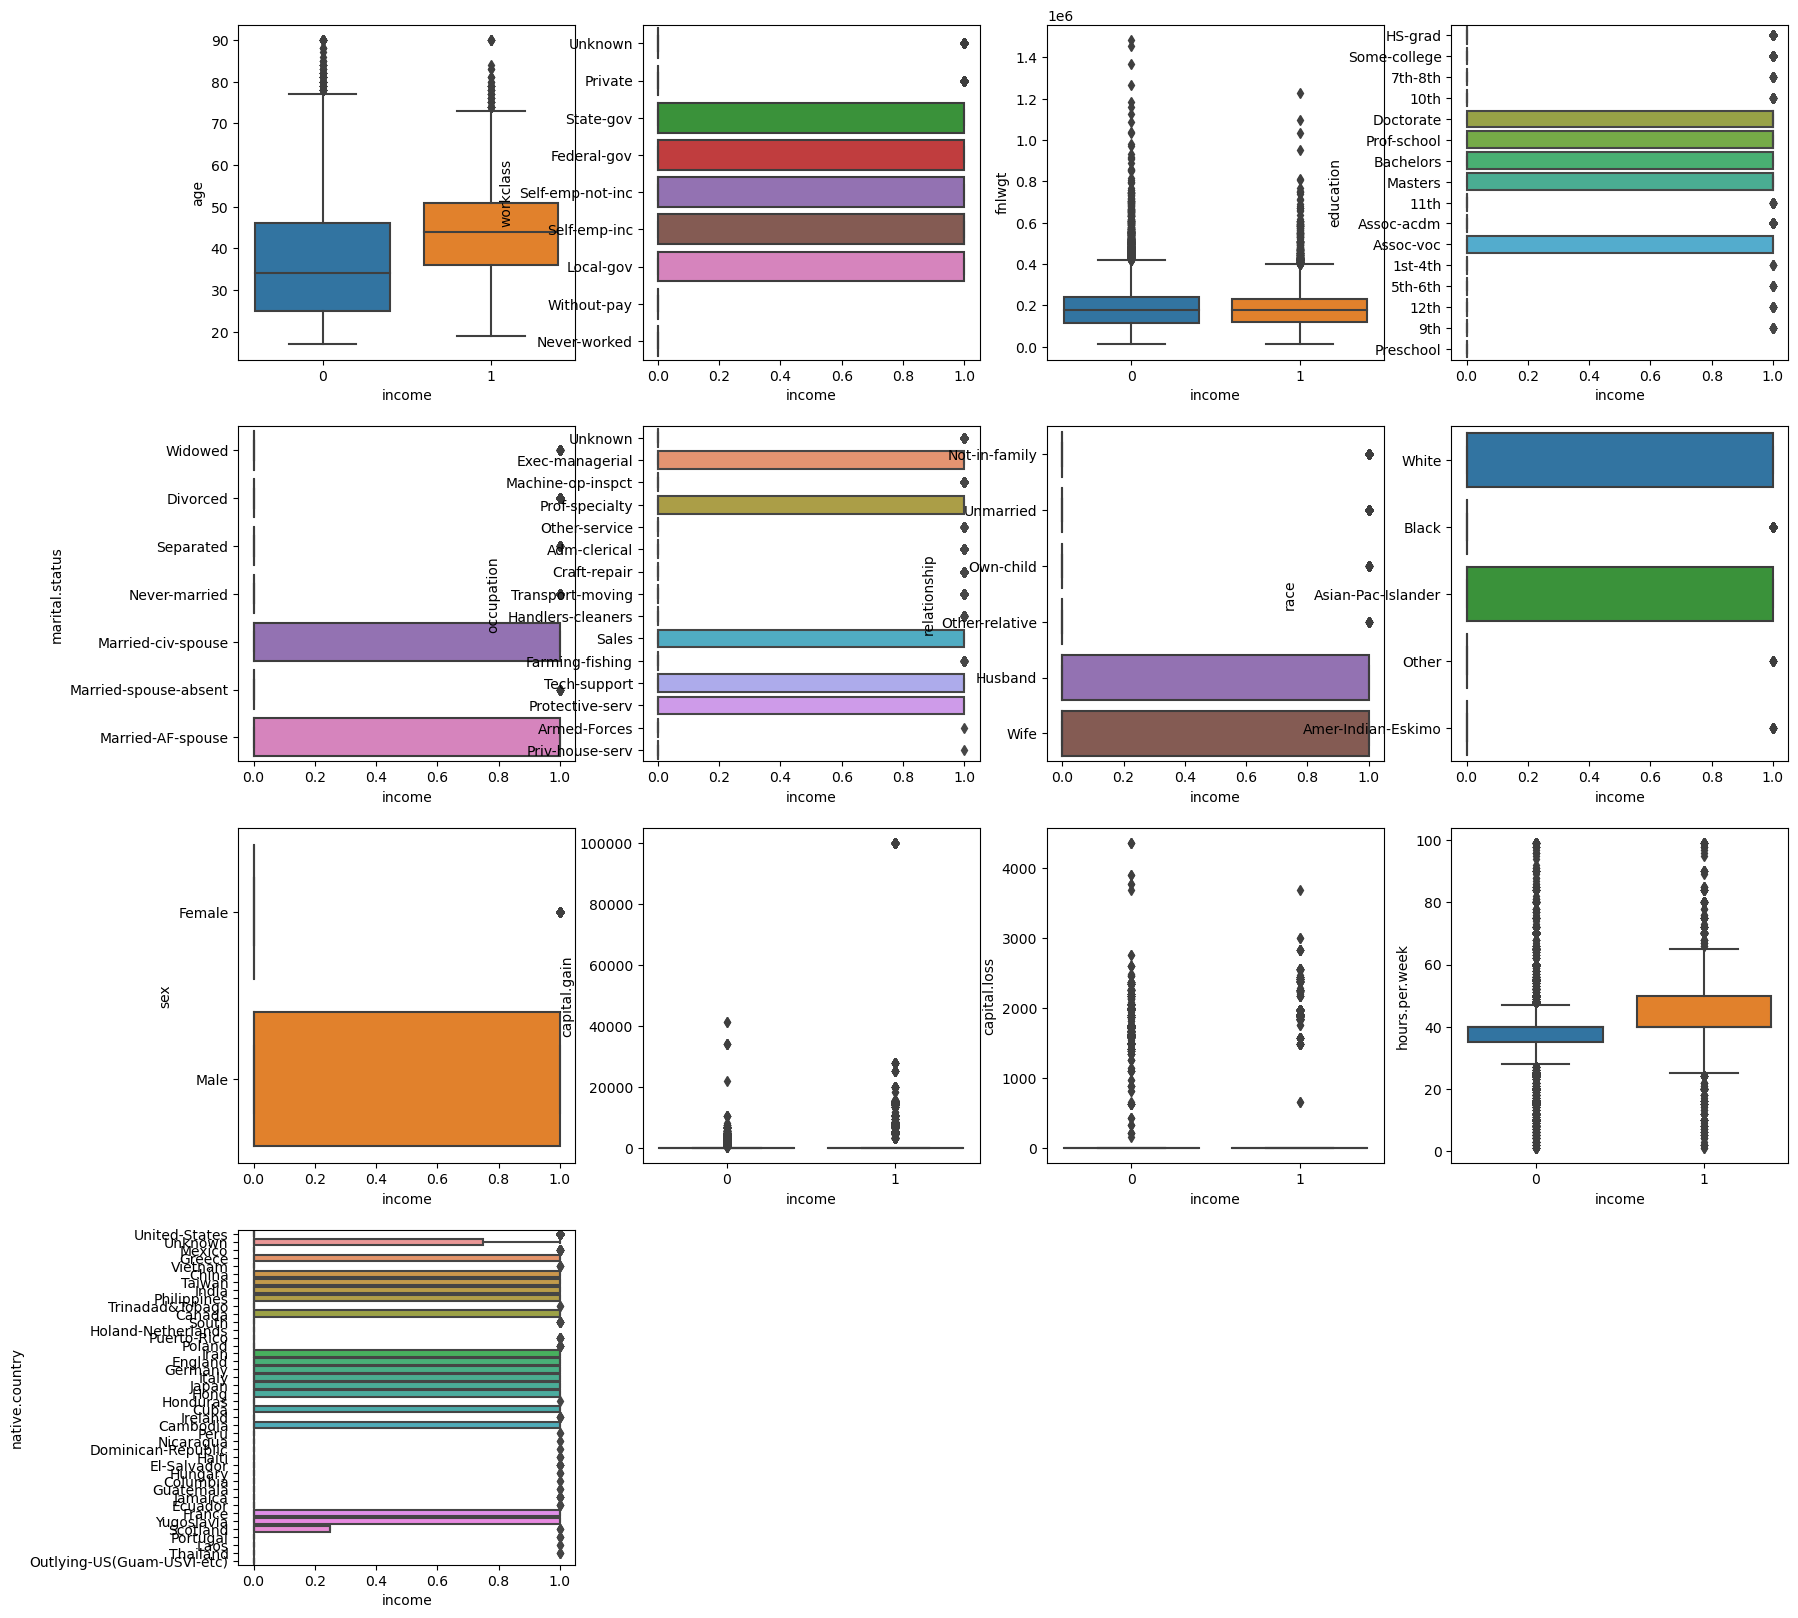

In [26]:
num_rows = 4
num_cols = 4
index = 0
plt.figure(figsize=(20, 20))
for feature in df.columns:
    if feature != "income":
        index += 1
        plt.subplot(num_rows, num_cols, index)
        sns.boxplot(x='income', y=feature, data=df)
plt.show()

In [27]:
df.corr()


,age,fnlwgt,capital.gain,capital.loss,hours.per.week,income
age,1.000,-0.076,0.078,0.058,0.069,0.234
fnlwgt,-0.076,1.000,0.000,-0.010,-0.019,-0.010
capital.gain,0.078,0.000,1.000,-0.032,0.078,0.223
capital.loss,0.058,-0.010,-0.032,1.000,0.054,0.151
hours.per.week,0.069,-0.019,0.078,0.054,1.000,0.230
income,0.234,-0.010,0.223,0.151,0.230,1.000


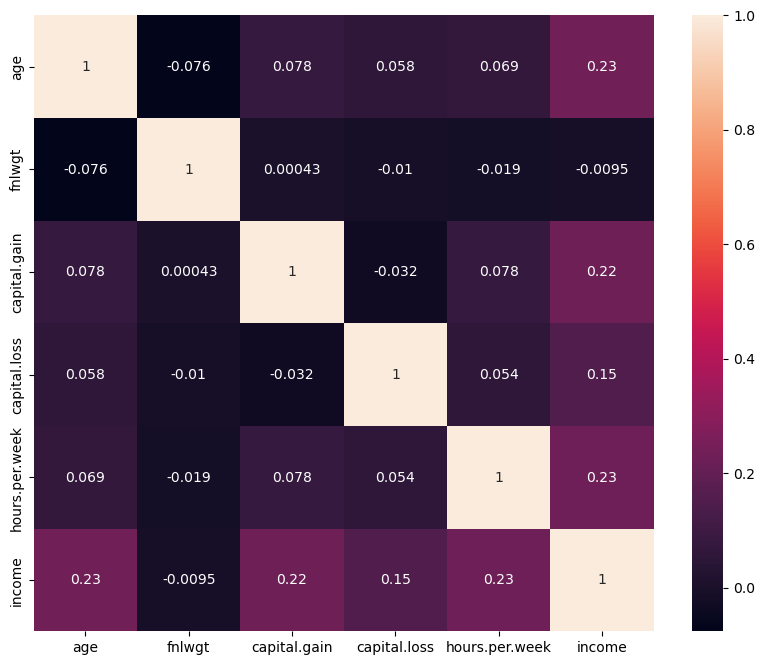

In [28]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(), annot=True)
plt.show()

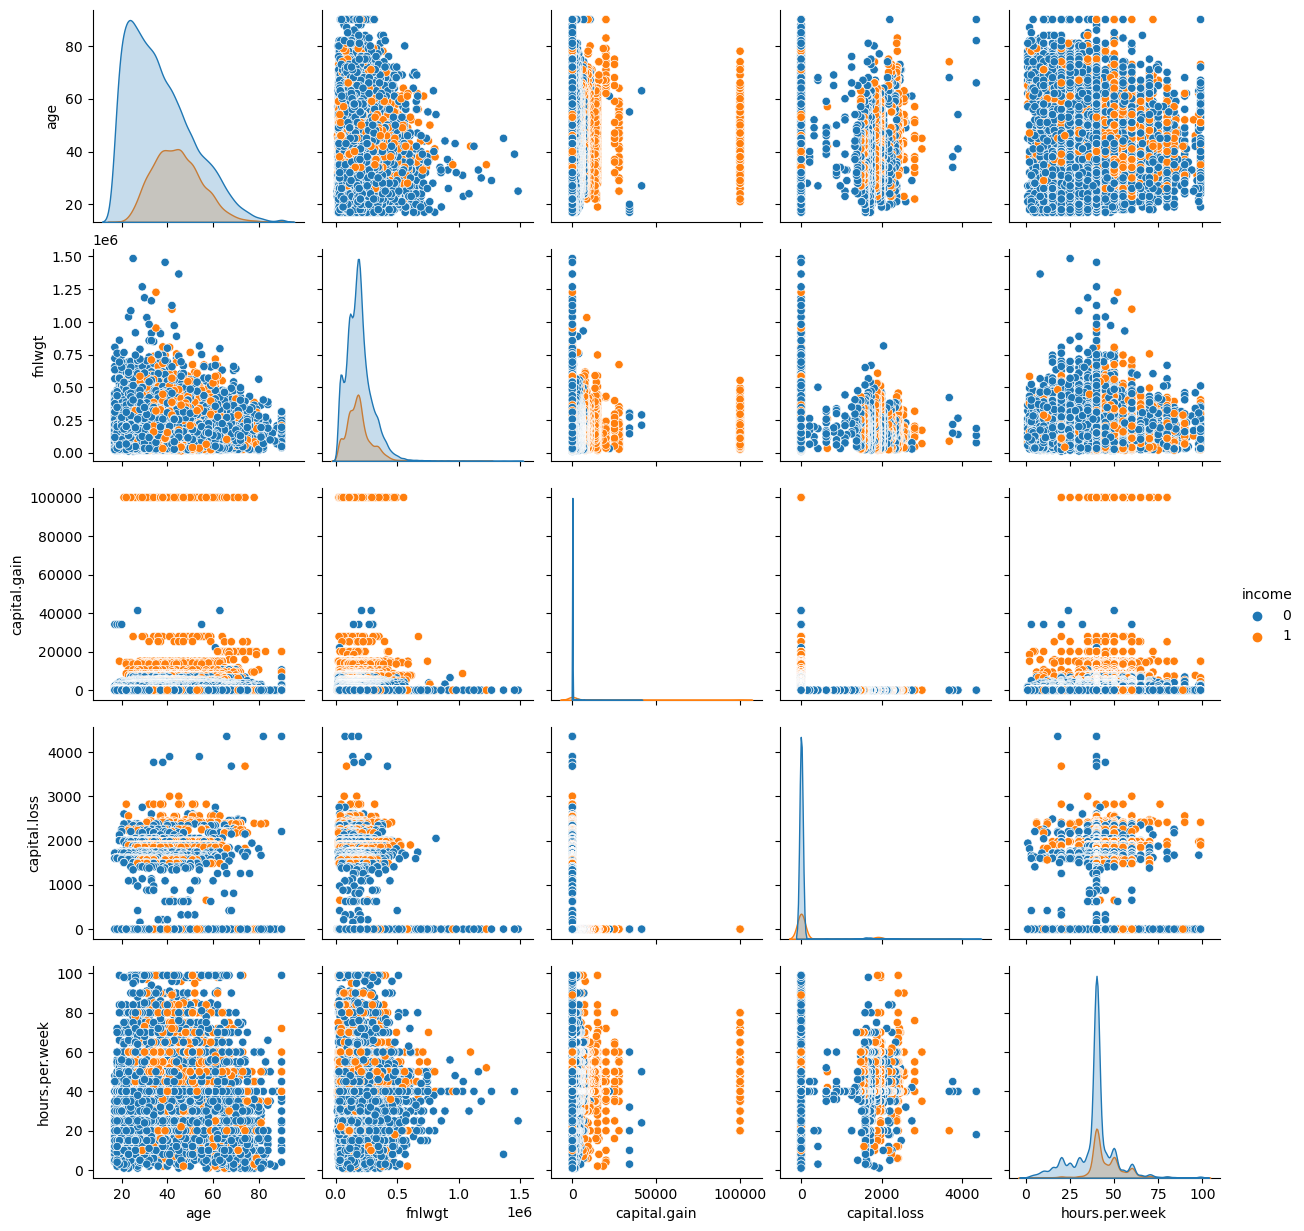

In [29]:
sns.pairplot(df, hue = "income");

In [30]:
class_distribution = df['income'].value_counts()
class_distribution

0    24698
1     7839
Name: income, dtype: int64

# Train-Test

In [31]:
X = df.drop(["income"], axis = 1)
y = df["income"]

In [32]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=42)

In [34]:
scaler = StandardScaler()

In [36]:
from sklearn.preprocessing import StandardScaler


X_train_num = X_train.select_dtypes(include=['int64', 'float64'])
X_test_num = X_test.select_dtypes(include=['int64', 'float64'])

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_num)
X_test_scaled = scaler.transform(X_test_num)




# Logistic Regression

In [37]:
from sklearn.linear_model import LogisticRegression

In [38]:
log_model=LogisticRegression()

In [39]:
log_model.fit(X_train_scaled, y_train)

LogisticRegression()

In [40]:
y_pred = log_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [41]:
y_pred_proba = log_model.predict_proba(X_test_scaled)
y_pred_proba

array([[0.26268723, 0.73731277],
       [0.85503259, 0.14496741],
       [0.89872625, 0.10127375],
       ...,
       [0.84331806, 0.15668194],
       [0.86216109, 0.13783891],
       [0.9464088 , 0.0535912 ]])

In [42]:
test_data = pd.concat([X_test, y_test], axis=1)
test_data["pred"] = y_pred
test_data["pred_proba"] = y_pred_proba[:,1]
test_data.head(10)

,age,workclass,fnlwgt,education,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income,pred,pred_proba
21111,39,Self-emp-inc,163057,Some-college,Divorced,Craft-repair,Not-in-family,White,Male,0,0,99,United-States,0,1,0.737
21478,35,Private,183800,Bachelors,Married-civ-spouse,Adm-clerical,Husband,White,Male,0,0,40,United-States,1,0,0.145
20824,31,Private,114937,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,35,United-States,0,0,0.101
22147,67,Self-emp-inc,116517,Bachelors,Widowed,Other-service,Unmarried,White,Female,0,0,35,United-States,0,0,0.317
11438,56,Self-emp-not-inc,249368,HS-grad,Married-spouse-absent,Exec-managerial,Not-in-family,White,Male,0,0,70,United-States,0,1,0.605
17418,35,Local-gov,230754,Masters,Never-married,Prof-specialty,Own-child,Black,Female,0,0,40,United-States,0,0,0.147
5187,34,Local-gov,167999,HS-grad,Divorced,Adm-clerical,Unmarried,White,Female,0,0,33,United-States,0,0,0.106
10014,18,Private,214617,Some-college,Never-married,Handlers-cleaners,Own-child,White,Male,0,0,30,United-States,0,0,0.053
4655,46,Federal-gov,371373,HS-grad,Divorced,Adm-clerical,Not-in-family,White,Male,0,0,40,United-States,0,0,0.219
2509,60,State-gov,165827,Doctorate,Married-civ-spouse,Prof-specialty,Husband,White,Male,7688,0,60,United-States,1,1,0.930


# Model Performance

In [43]:
from sklearn.metrics import confusion_matrix, classification_report

In [44]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

In [45]:
eval_metric(log_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[4742  198]
 [1129  439]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88      4940
           1       0.69      0.28      0.40      1568

    accuracy                           0.80      6508
   macro avg       0.75      0.62      0.64      6508
weighted avg       0.78      0.80      0.76      6508


Train_Set
[[19008   750]
 [ 4413  1858]]
              precision    recall  f1-score   support

           0       0.81      0.96      0.88     19758
           1       0.71      0.30      0.42      6271

    accuracy                           0.80     26029
   macro avg       0.76      0.63      0.65     26029
weighted avg       0.79      0.80      0.77     26029



Gridsearch

In [46]:
from sklearn.model_selection import GridSearchCV

In [47]:
model = LogisticRegression(random_state=42, max_iter=100000)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight=['balanced', None]
solver = ['lbfgs', 'liblinear', 'sag', 'saga']

param_grid = {"penalty" : penalty,
             "C" : C,
             "class_weight": class_weight,
             "solver" : solver}

grid_model = GridSearchCV(estimator= model,
                          param_grid= param_grid,
                         cv = 10,
                         scoring = "recall",
                         n_jobs = -1)

In [48]:
grid_model.fit(X_train_scaled,y_train)

GridSearchCV(cv=10,
             estimator=LogisticRegression(max_iter=100000, random_state=42),
             n_jobs=-1,
             param_grid={'C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2'],
                         'solver': ['lbfgs', 'liblinear', 'sag', 'saga']},
             scoring='recall')

In [49]:
grid_model.best_params_

{'C': 0.1, 'class_weight': 'balanced', 'penalty': 'l2', 'solver': 'lbfgs'}

In [50]:
grid_model.best_score_

0.6418452036286431

In [51]:
eval_metric(grid_model, X_train_scaled, y_train, X_test_scaled, y_test)

Test_Set
[[3606 1334]
 [ 568 1000]]
              precision    recall  f1-score   support

           0       0.86      0.73      0.79      4940
           1       0.43      0.64      0.51      1568

    accuracy                           0.71      6508
   macro avg       0.65      0.68      0.65      6508
weighted avg       0.76      0.71      0.72      6508


Train_Set
[[14638  5120]
 [ 2246  4025]]
              precision    recall  f1-score   support

           0       0.87      0.74      0.80     19758
           1       0.44      0.64      0.52      6271

    accuracy                           0.72     26029
   macro avg       0.65      0.69      0.66     26029
weighted avg       0.76      0.72      0.73     26029



# K-Nearest Neighbors (KNN) Classification

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
knn_model = KNeighborsClassifier(n_neighbors=5) 

In [54]:
knn_model.fit(X_train_scaled,y_train)

KNeighborsClassifier()

In [55]:
y_pred = knn_model.predict(X_test_scaled)
y_pred

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [56]:
y_pred_proba = knn_model.predict_proba(X_test_scaled)

In [57]:
pd.DataFrame(y_pred_proba)

,0,1
0,0.400,0.600
1,1.000,0.000
2,0.800,0.200
3,1.000,0.000
4,1.000,0.000
...,...,...
6503,0.600,0.400
6504,0.400,0.600
6505,1.000,0.000
6506,1.000,0.000


In [58]:
my_dict = {"Actual": y_test, "Pred":y_pred, "Proba_1":y_pred_proba[:,1], "Proba_0":y_pred_proba[:,0]}

In [59]:
pd.DataFrame.from_dict(my_dict).sample(10)

,Actual,Pred,Proba_1,Proba_0
21095,0,0,0.000,1.000
23338,1,0,0.200,0.800
10081,0,0,0.000,1.000
525,0,0,0.400,0.600
17637,0,0,0.000,1.000
7940,0,0,0.000,1.000
27678,0,0,0.000,1.000
19235,0,0,0.000,1.000
26249,0,0,0.200,0.800
16219,1,0,0.400,0.600


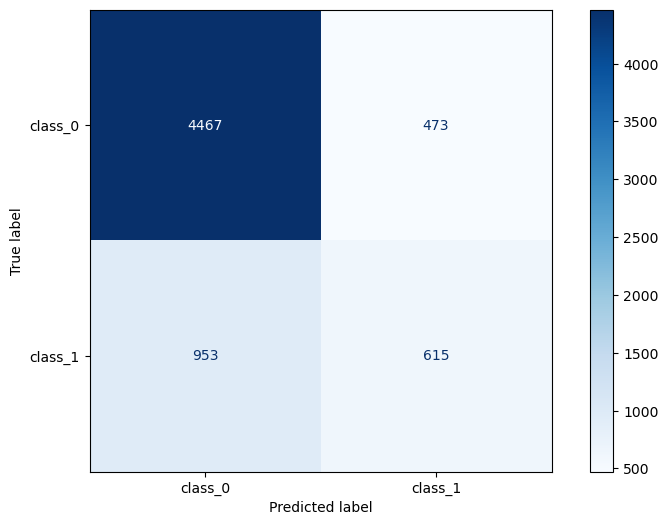

In [60]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.neighbors import KNeighborsClassifier

# Assuming you have already defined and trained your knn_model
# Assuming you have scaled X_test and y_test

# Predict on the test set
y_pred = knn_model.predict(X_test_scaled)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix using ConfusionMatrixDisplay
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['class_0', 'class_1'])  # Replace class_0 and class_1 with your actual class names
disp.plot(cmap='Blues', values_format='d')

plt.show()


In [61]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[4467  473]
 [ 953  615]]
              precision    recall  f1-score   support

           0       0.82      0.90      0.86      4940
           1       0.57      0.39      0.46      1568

    accuracy                           0.78      6508
   macro avg       0.69      0.65      0.66      6508
weighted avg       0.76      0.78      0.77      6508



# Decision Tree Classification

In [62]:
from sklearn.tree import DecisionTreeClassifier


In [63]:
X = pd.get_dummies(df.drop("income", axis = 1), drop_first=True)
y = df["income"]

In [64]:
DT_model = DecisionTreeClassifier(random_state=101)

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 101)

In [66]:
DT_model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=101)

In [67]:
y_pred = DT_model.predict(X_test)

In [68]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

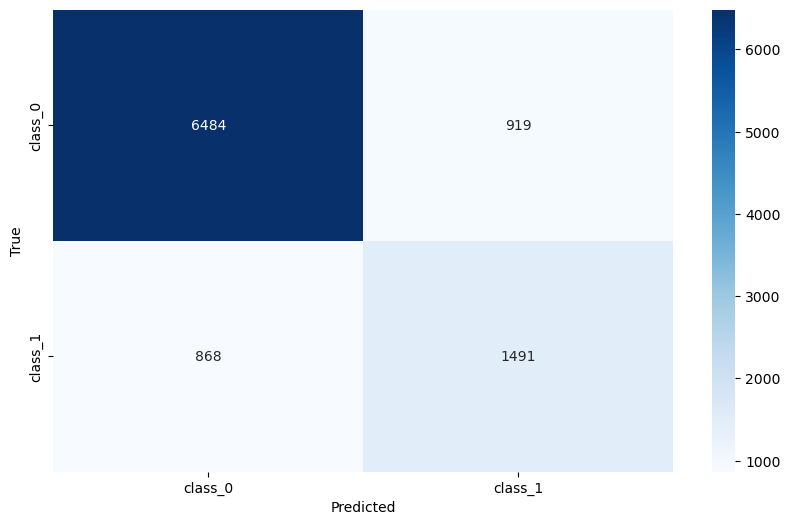

In [69]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier



# Predict on the test set
y_pred = DT_model.predict(X_test)


cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['class_0', 'class_1'], yticklabels=['class_0', 'class_1'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()


In [70]:
pip install yellowbrick


Note: you may need to restart the kernel to use updated packages.


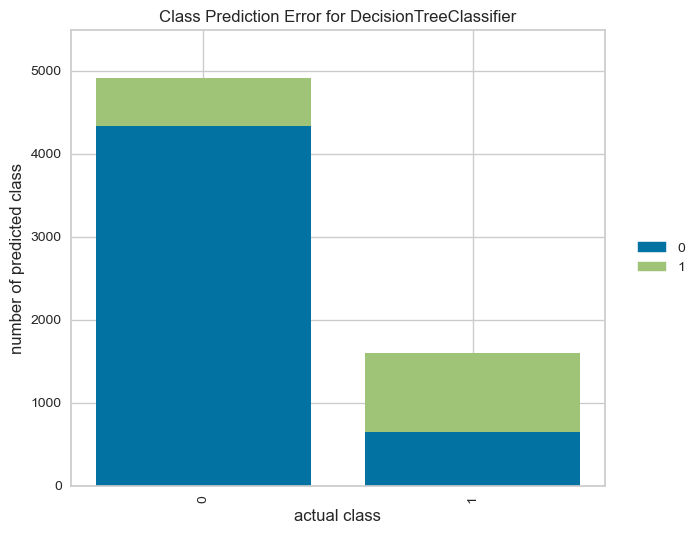

<Axes: title={'center': 'Class Prediction Error for DecisionTreeClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from yellowbrick.classifier import ClassPredictionError
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

DT_model = DecisionTreeClassifier()
DT_model.fit(X_train, y_train)


visualizer = ClassPredictionError(DT_model)


visualizer.fit(X_train, y_train)


visualizer.score(X_test, y_test)

visualizer.show()


In [ ]:
eval_metric(DT_model, X_train, y_train, X_test, y_test)

Test_Set
[[4341  647]
 [ 565  955]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      4988
           1       0.60      0.63      0.61      1520

    accuracy                           0.81      6508
   macro avg       0.74      0.75      0.74      6508
weighted avg       0.82      0.81      0.82      6508


Train_Set
[[19710     0]
 [    1  6318]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     19710
           1       1.00      1.00      1.00      6319

    accuracy                           1.00     26029
   macro avg       1.00      1.00      1.00     26029
weighted avg       1.00      1.00      1.00     26029



In [ ]:
Feature Importance

SyntaxError: invalid syntax (2871045760.py, line 1)

In [72]:
DT_model.feature_importances_

array([1.10542891e-01, 1.95769530e-01, 1.19532372e-01, 5.31736276e-02,
       6.35864768e-02, 5.64160889e-03, 0.00000000e+00, 1.18084347e-02,
       5.72145486e-03, 8.10986663e-03, 5.05056024e-03, 1.62041542e-03,
       0.00000000e+00, 9.46727727e-04, 1.22242975e-03, 6.96701319e-05,
       3.50959758e-04, 1.00766962e-03, 8.53687982e-04, 4.38248351e-03,
       5.90482326e-03, 2.43776443e-02, 4.67163965e-03, 7.69690750e-03,
       2.09786755e-02, 2.04580376e-04, 4.04863794e-03, 6.32653893e-03,
       6.66760581e-04, 1.98645900e-01, 6.64606438e-04, 2.76111305e-03,
       8.92192917e-04, 1.24304584e-03, 0.00000000e+00, 7.46696547e-03,
       1.33429268e-02, 3.57380601e-03, 2.79817534e-03, 6.57948345e-03,
       5.14040188e-03, 0.00000000e+00, 1.54006413e-02, 3.68036766e-03,
       8.55952182e-03, 4.31118436e-03, 6.38024706e-03, 1.34520684e-03,
       2.62708177e-03, 1.51254179e-03, 1.52628990e-03, 2.15230231e-03,
       4.65199329e-03, 1.51409802e-03, 5.15784021e-03, 7.33269008e-04,
      

In [73]:
df_f_i = pd.DataFrame(index=X.columns, data = DT_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i

,Feature Importance
native.country_Ireland,0.000
native.country_Hong,0.000
native.country_Honduras,0.000
native.country_Holand-Netherlands,0.000
occupation_Priv-house-serv,0.000
...,...
hours.per.week,0.064
age,0.111
capital.gain,0.120
fnlwgt,0.196


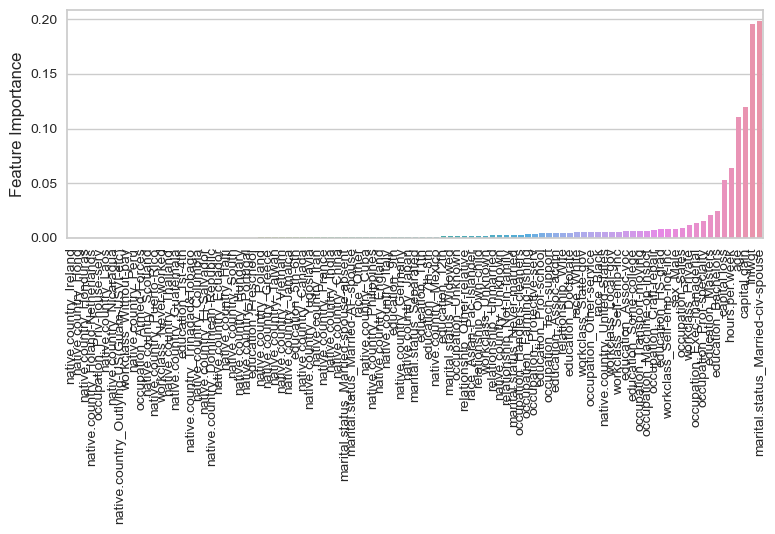

In [74]:
sns.barplot(x = df_f_i.index, y = 'Feature Importance', data = df_f_i)
plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

In [75]:
X2 = X.drop(columns = ["marital.status_Married-civ-spouse"])

In [76]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size=0.3, random_state=101)

In [77]:
DT2_model = DecisionTreeClassifier(random_state = 101)

In [78]:
DT2_model.fit(X_train2, y_train2) 

DecisionTreeClassifier(random_state=101)

In [79]:
eval_metric(DT2_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[6475  928]
 [ 883 1476]]
              precision    recall  f1-score   support

           0       0.88      0.87      0.88      7403
           1       0.61      0.63      0.62      2359

    accuracy                           0.81      9762
   macro avg       0.75      0.75      0.75      9762
weighted avg       0.82      0.81      0.82      9762


Train_Set
[[17295     0]
 [    1  5479]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     17295
           1       1.00      1.00      1.00      5480

    accuracy                           1.00     22775
   macro avg       1.00      1.00      1.00     22775
weighted avg       1.00      1.00      1.00     22775



In [80]:
df_f_i2 = pd.DataFrame(index=X2.columns, data = DT2_model.feature_importances_, 
                      columns = ["Feature Importance"]).sort_values("Feature Importance")
df_f_i2

,Feature Importance
occupation_Armed-Forces,0.000
native.country_Hungary,0.000
native.country_Thailand,0.000
native.country_Honduras,0.000
native.country_Holand-Netherlands,0.000
...,...
hours.per.week,0.065
marital.status_Never-married,0.078
age,0.117
capital.gain,0.160


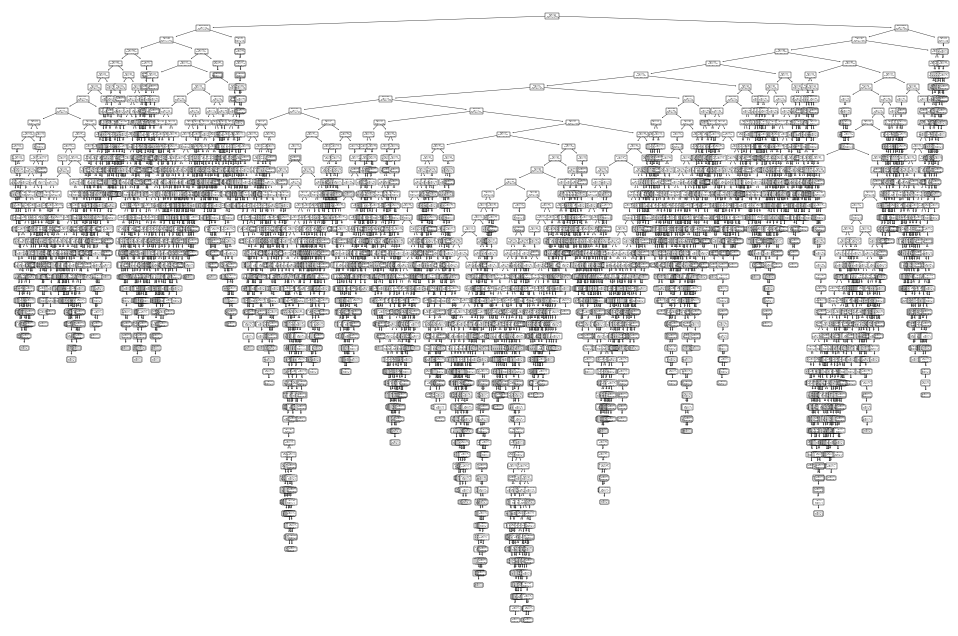

In [81]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier, plot_tree


plt.figure(figsize=(12, 8))
plot_tree(DT_model)
plt.show()


In [82]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

In [84]:
from sklearn.model_selection import GridSearchCV


In [87]:
model = DecisionTreeClassifier(random_state=101)

In [88]:
param_grid = {"splitter":["best", "random"],
              "max_features":[None, "auto", "log2", 2, 3, 4, 5, 6, 7],
              "max_depth": [None, 2, 3, 4, 5],
              "min_samples_leaf": [1, 2, 3, 4, 5, 6, 7],
              "min_samples_split": [2, 3, 5, 6, 7, 8, 9]}

In [89]:
grid_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          scoring='f1_micro',
                          cv=10,
                          n_jobs = -1)

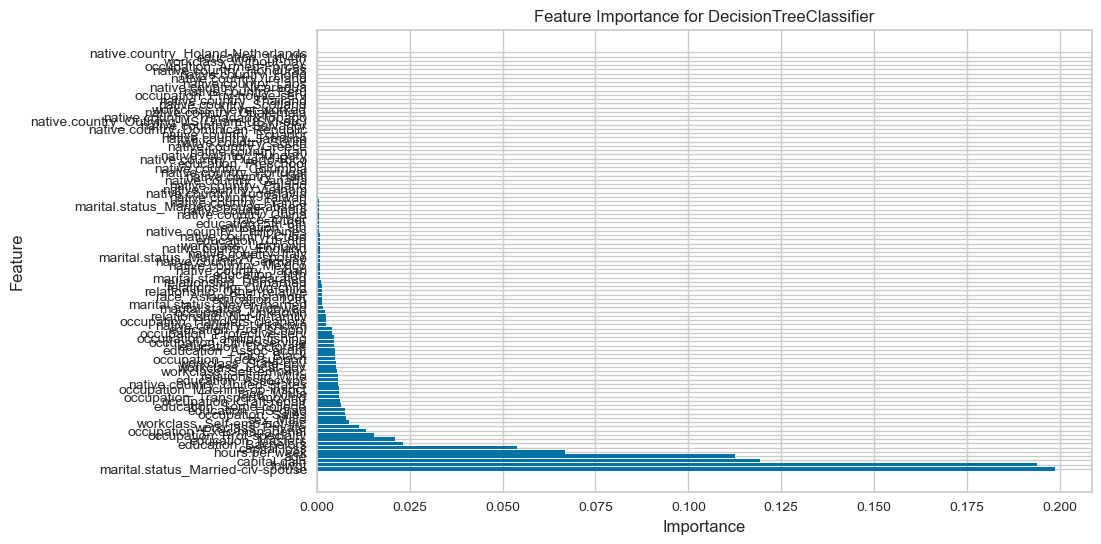

                              Feature  Importance
29  marital.status_Married-civ-spouse       0.199
1                              fnlwgt       0.194
2                        capital.gain       0.119
0                                 age       0.113
4                      hours.per.week       0.067
..                                ...         ...
72            native.country_Honduras       0.000
34            occupation_Armed-Forces       0.000
12              workclass_Without-pay       0.000
15                  education_1st-4th       0.000
71  native.country_Holand-Netherlands       0.000

[99 rows x 2 columns]


In [90]:
import matplotlib.pyplot as plt
import numpy as np

# Fit the DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=101)
model.fit(X_train, y_train)

# Get the feature importances
importances = model.feature_importances_

# Create a DataFrame with feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': importances})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance for DecisionTreeClassifier')
plt.show()

print(feature_importance_df)


In [91]:
grid_model.fit(X_train2, y_train2)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=101),
             n_jobs=-1,
             param_grid={'max_depth': [None, 2, 3, 4, 5],
                         'max_features': [None, 'auto', 'log2', 2, 3, 4, 5, 6,
                                          7],
                         'min_samples_leaf': [1, 2, 3, 4, 5, 6, 7],
                         'min_samples_split': [2, 3, 5, 6, 7, 8, 9],
                         'splitter': ['best', 'random']},
             scoring='f1_micro')

In [94]:
grid_model.best_params_

{'max_depth': None,
 'max_features': None,
 'min_samples_leaf': 7,
 'min_samples_split': 2,
 'splitter': 'random'}

In [95]:
def report_model(model):
    model_pred = model.predict(X_test)
    model_train_pred = model.predict(X_train)
    print('\n')
    print("Test Set")
    print(confusion_matrix(y_test, model_pred))
    print('\n')
    print(classification_report(y_test,model_pred))
    print('\n')
    print("Train Set")
    print(confusion_matrix(y_train, model_train_pred))
    print('\n')
    print(classification_report(y_train,model_train_pred))
    plt.figure(figsize=(12,8),dpi=100)
    plot_tree(model,filled=True, feature_names=X.columns, class_names=df.species.unique());

In [96]:
eval_metric(grid_model, X_train2, y_train2, X_test2, y_test2)

Test_Set
[[6793  610]
 [ 961 1398]]
              precision    recall  f1-score   support

           0       0.88      0.92      0.90      7403
           1       0.70      0.59      0.64      2359

    accuracy                           0.84      9762
   macro avg       0.79      0.76      0.77      9762
weighted avg       0.83      0.84      0.83      9762


Train_Set
[[16284  1011]
 [ 1794  3686]]
              precision    recall  f1-score   support

           0       0.90      0.94      0.92     17295
           1       0.78      0.67      0.72      5480

    accuracy                           0.88     22775
   macro avg       0.84      0.81      0.82     22775
weighted avg       0.87      0.88      0.87     22775



In [ ]:
Decision Tree kullanırdım f1 score diğer modellere göre daha iyi 0.83 ve accuracy 0.84 doğru tahmin %84